## HCAHPS Analysis
        1.Analyze - Which counties in CA have the best/worst rated hospitals
        2.Analyze - If Median Household income seem to have any effect on the hospital ratings
        3.Analyze - If Population across the county has any effect on the hospital ratings
        4.Analyze - HCAHP Score categories and their ratings 'Spread', 'Distribution'

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Load the Final Merged Data Set

In [2]:
merged_pd = pd.read_csv("Final_Merged_Data_Set.csv")
merged_pd.head(5)

,Provider ID,Cleanliness,Nurse_com,Doc_com,Staff_responsiveness,Pain_management,Comm_medicine,Discharge_info,Care_transition,Overall_Hos_Rating,...,# Limited Access,% Limited Access,# Uninsured Adults,# Uninsured Children,% Uninsured Adults,% Uninsured Children,Household Income,# Not Proficient in English,% Not Proficient in English,Population
0,50002,2,2,2,2,2,2,2,1,2,...,24227.0,2.0,178422.0,21348.0,17.0,6.0,76996.0,135827.0,9.3,1610921.0
1,50006,2,2,2,2,3,2,3,2,2,...,8754.0,7.0,21268.0,2358.0,25.0,9.0,40581.0,2216.0,1.7,134809.0
2,50007,3,4,3,3,4,3,3,4,5,...,11019.0,2.0,67700.0,10443.0,14.0,6.0,100806.0,58662.0,8.5,758581.0
3,50008,2,2,3,2,3,2,2,2,3,...,11090.0,1.0,83244.0,6147.0,14.0,5.0,83788.0,104023.0,13.1,852469.0
4,50009,2,3,3,3,3,3,3,2,3,...,3609.0,3.0,17792.0,2623.0,21.0,8.0,71063.0,11763.0,9.0,141667.0


### The maximum "Overall HCAHPS Score" per County

In [17]:
# Merge data per County
merged_grp_county = merged_pd.groupby('County')
# find the highest rated hospital in each County
maxScore_County = merged_grp_county['Overall_Hos_Rating'].max()


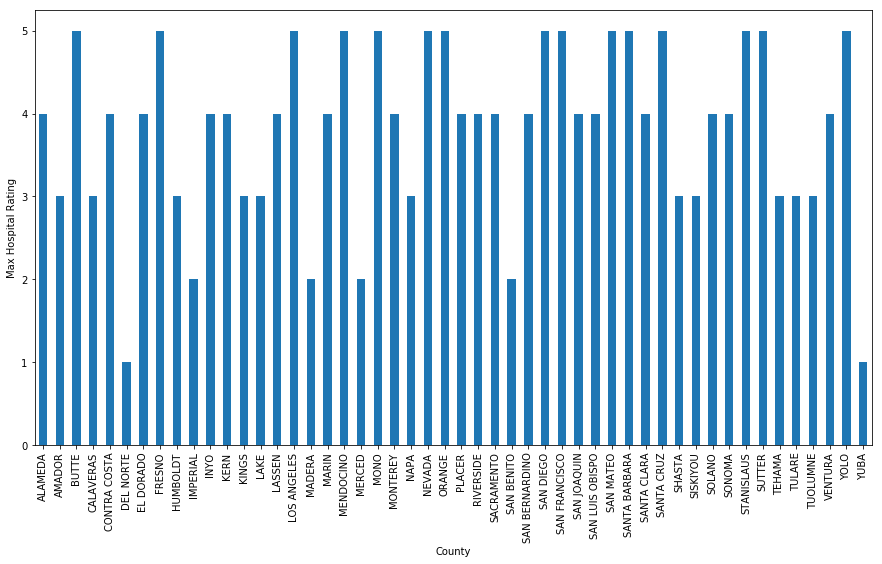

In [30]:

# Plot a bar graph to show the highest ratings for each County
maxScore_County.plot(kind = 'bar', use_index = True, figsize = (15,8))
# Label for Y-axis
plt.ylabel('Max Hospital Rating')
# Save PNG file of the plot
plt.savefig('MaxRating_perCounty.png', bbox_inches="tight")
# Display Plot
plt.show()

### Scatter Plot of Household Income vs Overall Hospital Rating

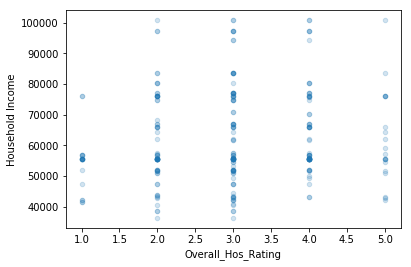

In [4]:
# Plot Hospital Rating vs Household income
merged_pd.plot.scatter('Overall_Hos_Rating','Household Income',alpha=.2)
plt.savefig("Ratings_Income_ScatterPlot.png",bbox_inches="tight")
plt.show()

### Scatter Plot of Household Income vs Summary Star Rating

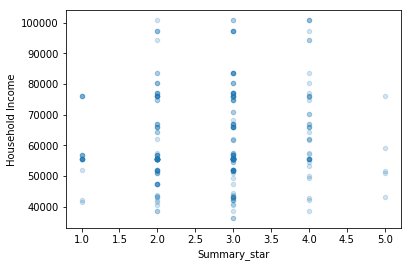

In [5]:
# Plot summary star rating vs Household Income
merged_pd.plot.scatter('Summary_star','Household Income',alpha=.2)
plt.savefig("SummaryRatings_Income_ScatterPlot.png", bbox_inches="tight")
plt.show()

### Scatter Plot of Population vs Overall Hospital Rating

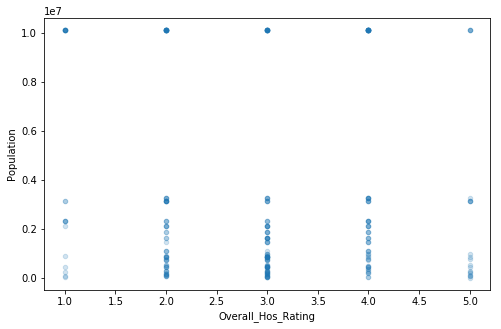

In [9]:
# Plot of Rating vs Population
merged_pd.plot.scatter('Overall_Hos_Rating', 'Population',alpha=.2, figsize = (8,5))
plt.savefig("Rating_Population_ScatterPlot.png",bbox_inches="tight")
plt.show()

### Box Plot to show the distribution of a HCAHPS score (at a glance)

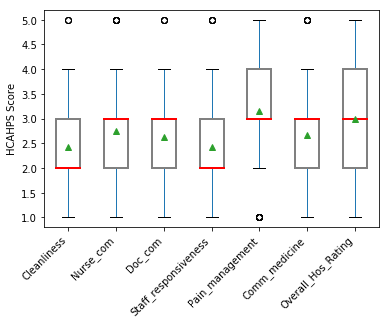

In [10]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')

bp = merged_pd.boxplot(['Cleanliness','Nurse_com','Doc_com','Staff_responsiveness',
                  'Pain_management','Comm_medicine', 'Overall_Hos_Rating' ],
                 grid=False, rot=45, meanline=True, showmeans= True, patch_artist=True, return_type= 'dict')

# set the color for median bars to red
for median in bp['medians']:
    median.set(color='r', linewidth=2)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='grey', linewidth=2)
    # change fill color
    box.set( facecolor = 'white' )

plt.xticks(ha='right') # ha sets the alignment of the xlabel
plt.ylabel('HCAHPS Score')
plt.savefig("BoxPlot_HCAHPS.png",bbox_inches="tight") 
# bbox_inches parameter in savefig ensures that the saved figure has all the annotation 
# and text outside of the plot. Without this my x-lables are not being saved in the png file. 
plt.show()
# the red lines in the plot show the median, the green triangles represent the mean value.